In [2]:
import pandas as pd

# 读取数据，指定索引列
data = pd.read_excel('/home/jeff/python_data/chapter3/chapter3/demo/data/catering_sale.xls', index_col = u'日期')

# 处理缺失值
data.fillna(method='ffill').describe()
data.dropna().describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


/home/jeff/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/home/jeff/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


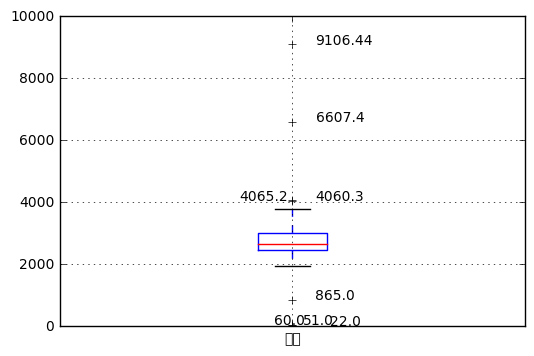

In [3]:
# 通过箱线图查看离群值

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
p = data.boxplot()
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()

for i in range(len(x)):
    if i>0:
        plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]), y[i]))
    else:
        plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08, y[i]))
plt.show()

In [5]:
import numpy as np
print(data.销量.max() - data.销量.min())
data = data.dropna()
data['sale_group'] = pd.cut(data['销量'], 4)#range(0, 10000, 1000))
data.groupby('sale_group')['销量'].count()

9084.44


sale_group
(12.916, 2293.11]      23
(2293.11, 4564.22]    175
(4564.22, 6835.33]      1
(6835.33, 9106.44]      1
Name: 销量, dtype: int64